### Homework 4: Discover the Higgs Boson!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=18)
plt.rc('figure',figsize=(8,6))

For this worksheet, we provide you with a (simplified) version of the simulated Higgs boson data challenge, run by Kaggle in 2014. The files are called "Higgs_features.csv" and "Higgs_labels.csv". The labels are 0 and 1, corresponding to "no Higgs signal", and "Higgs signal".

1\. Read the data into two numpy arrays or data frames, one for features and one for labels.

In [12]:
features=pd.read_csv("Higgs_features.csv",header=None)
labels=pd.read_csv("Higgs_labels.csv",header=None)

In [13]:
features.head()

,0,1,2,3,4,5,6,7
0,393.335,79.460,308.879,4.095,1.403,-1.411,49.063,39.478
1,71.048,29.291,55.602,2.439,1.667,-1.412,22.926,9.486
2,141.450,87.017,72.091,1.472,4.714,1.233,23.591,69.754
3,156.539,39.797,127.933,4.017,1.279,-1.408,21.415,18.222
4,89.639,34.399,66.741,2.934,1.417,-1.377,26.459,8.257


In [14]:
labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       25000 non-null  float64
 1   1       25000 non-null  float64
 2   2       25000 non-null  float64
 3   3       25000 non-null  float64
 4   4       25000 non-null  float64
 5   5       25000 non-null  float64
 6   6       25000 non-null  float64
 7   7       25000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [16]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       25000 non-null  int64
dtypes: int64(1)
memory usage: 195.4 KB


2\. How many instances and features are in this data set?

In [17]:
print('Number of instances',features.shape[0],'Number of features',features.shape[1])

Number of instances 25000 Number of features 8


3\. Plot the distribution of each feature for this data set in a histogram, in one plot. Add a legend (with labels "Feature 1", "Feature 2"...) and set the transparency of the histograms (property "alpha") to 0.5 for clarity. Hint: make sure you are plotting each column, not each row!

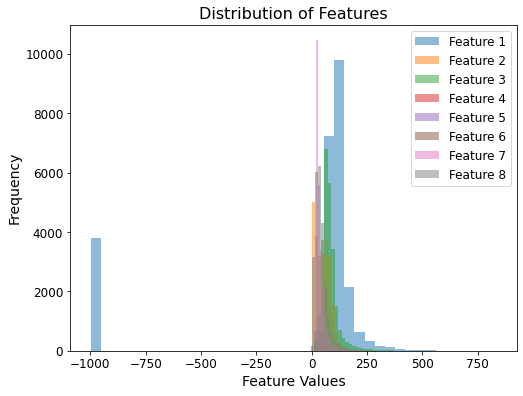

In [18]:
for i in range(features.shape[1]):
    plt.hist(features.iloc[:,i],bins=40,alpha=0.5,label=('Feature %d'%(i+1)))
plt.title('Distribution of Features')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()

4\. Do you see anything unusual in the distribution of any of the features? What problem could this cause?

#### The feature values generally range from ~0-500, however ~-1000 has a frequency of ~4000, which is a clear outlier. This can introduce bias into the model, the model may give too much importance to these extreme values ???????????????????

5\. How many positive (Higgs) events does your data set contain? Based on this, is the data set balanced or unbalanced?

In [19]:
print('There are %d Higgs events out of %d events'%((np.sum(labels==1)),len(labels)))

There are 8474 Higgs events out of 25000 events


#### Based on this, the data set is unbalanced since ~ $\frac{1}{3}$ of the events are Higgs events, which is relatively far from $\frac{1}{2}$ events

6\. On the basis of your answer to 5, which evaluation metric (accuracy, precision, recall) would you like to pick for this data set?

#### We definitely wouldn't want to use accuracy because of the class imbalance. Assuming the cost of false negatives is high, recall is the best evaluation metric.

7\. Use a decision tree classifier as your model, and do five fold cross validation on your data, <b> using the scoring parameter you chose above</b>. Report the mean and standard deviation of the scores obtained for the five folds.

Note: If you simply set the parameter "cv = 5" in the cross_val_score function, this will divide the data in five sets using the first 20%, second 20%... etc of your data, which is not great if your data are in a specific order. Make sure you use cv = StratifiedKFold(shuffle=True, n_splits=5).


In [20]:
model=DecisionTreeClassifier()

cv=StratifiedKFold(shuffle=True,n_splits=5)

scores=cross_val_score(model,features,labels,cv=cv,scoring='recall')

print('Mean recall over 5 folds: %.3f'% scores.mean())
print('Standard deviation over 5 folds: %.3f'% scores.std())

Mean recall over 5 folds: 0.633
Standard deviation over 5 folds: 0.018


8\. We want to now take a look at the confusion matrix for your classifier. Generate the predicted label using the "cross_val_predict" function, then print the confusion matrix.

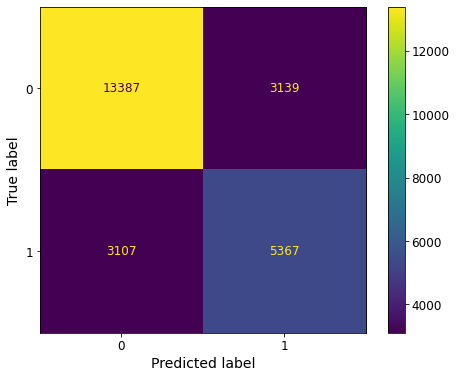

In [21]:
predicted_labels=cross_val_predict(model, features, labels, cv=cv)

conf=confusion_matrix(labels,predicted_labels)

ConfusionMatrixDisplay(conf).plot()

9\. Given your confusion matrix, how many true positives / true negatives / false positives / false negatives are there? Do you have more type I errors (false positives) than type II errors (false negatives)?

In [22]:
tn,fp,fn,tp=conf[0,0],conf[0,1],conf[1,0],conf[1,1]
print('There are %d true negatives, %d false positives, %d false negatives and %d true positives'%(tn,fp,fn,tp))
if fp>fn:
    print('There are more type I errors')
else:
    print('There are more type II errors')

There are 13387 true negatives, 3139 false positives, 3107 false negatives and 5367 true positives
There are more type I errors


10\. Let's now switch to a SVC classifier. Leaving the parameters of the classifier at their default values, run a five-fold cross validation and report the scores just like you did above for the decision tree. (Note: SVMs are slow so this might take some time, a good 5 minutes. If it takes too long, you can reduce the number of folds to 3). Which algorithm performs better? 

In [23]:
svc_model=SVC()
flat_labels=labels.values.ravel()
svc_scores=cross_val_score(svc_model,features,flat_labels,cv=cv,scoring='recall')
print('Mean recall over 5 folds: %.3f'% svc_scores.mean())
print('Standard deviation over 5 folds: %.3f'% svc_scores.std())

Mean recall over 5 folds: 0.610
Standard deviation over 5 folds: 0.010


11\. Report the confusion matrix for the SVC algorithm. Do you notice a change in the distribution of the false positives and false negatives, with respect to the decision tree algorithm?

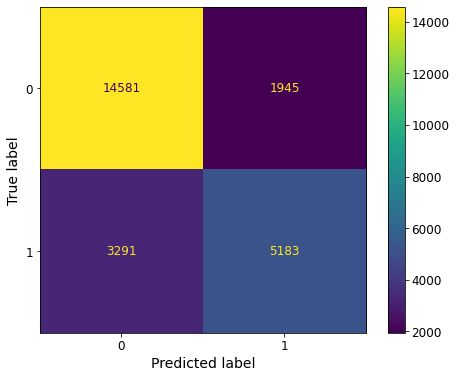

In [24]:
predicted_labels=cross_val_predict(svc_model, features, flat_labels, cv=cv)

svc_conf=confusion_matrix(flat_labels,predicted_labels)

ConfusionMatrixDisplay(svc_conf).plot()

In [25]:
tn,fp,fn,tp=svc_conf[0,0],svc_conf[0,1],svc_conf[1,0],svc_conf[1,1]
print('There are %d true negatives, %d false positives, %d false negatives and %d true positives'%(tn,fp,fn,tp))
if fp>fn:
    print('There are more type I errors')
else:
    print('There are more type II errors')

There are 14581 true negatives, 1945 false positives, 3291 false negatives and 5183 true positives
There are more type II errors


#### There are more type II errors, meaning there are more false negatives than false positives. This is not the correct direction as we would rather have more false positives

12\. We can now try to optimize the parameters of the SVC. Because it would otherwise take a long time, we can select the first 5% of the data set (after shuffling the data set). 

You can do it using the code below, but you need to change the original array names for features and targets to match yours. You will then produce the two arrays "Xlittle, ylittle".

In [26]:
from sklearn.utils import shuffle

ftrs, trgt = shuffle(features.values, flat_labels, random_state = 13)

number_samples = ftrs.shape[0]

Xlittle, ylittle = ftrs[:int(number_samples*0.05),:], trgt[:int(number_samples*0.05)]

Xlittle.shape #check that everything went as expected

(1250, 8)

13\. Set up and run a GridSearch CV with the following parameters: 

parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}

You can use the code from Lab 8 notebook, but remember to change the scoring parameter to match what you did above.

Note: this might take time! Set verbose = 2 in the GridSearchCV to follow the progress, and set njobs = 4 or more to speed up the process. 

#### Report the scores and parameters values of the best model.

In [27]:
parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}
nmodels = np.product([len(el) for el in parameters.values()])
model = GridSearchCV(svc_model, parameters, cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 2, n_jobs =-1, scoring='recall',return_train_score=True)
model.fit(Xlittle,ylittle)

print('Best params, best recall score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params, best recall score: 0.9787 {'C': 1, 'class_weight': {1: 5}, 'gamma': 0.01, 'kernel': 'linear'}


#### I tried using n_jobs=4 but it took 1.5 hours for my code to run, so I changed it to n_jobs=-1 so that it could take a reasonable amount of time to run.

14\. Based on what you found, would you recommend to use a Decision Tree Classifier or a Support Vector Classifier for this problem?

#### The Support Vector Classifier has a much higher recall, so I would use that, although it does take much longer to run.